In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("brain_stroke.csv",index_col=0)

In [4]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [5]:
from imblearn.over_sampling import ADASYN

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.nunique()

gender                   2
age                   8856
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    22404
bmi                   9979
smoking_status           3
stroke                   2
dtype: int64

In [8]:
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
smoking_status          0
stroke                  0
dtype: int64

In [9]:
df['smoking_status'].value_counts()

smoking_status
never smoked       34557
formerly smoked    11791
smokes              6923
Name: count, dtype: int64

In [10]:
df['bmi'].median()


28.4

In [11]:
df['bmi'].mean()

28.824857413639492

In [12]:
df['age'].min()

0.08

In [13]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, float('inf')]
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40', '41-50', '51-60', '60+']

# Create bins using pd.cut()
df['Age_Bin'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, right=False)

In [14]:
median_bmi_by_age_bin = df.groupby('Age_Bin')['bmi'].transform('median')

In [15]:
df['bmi'] = df['bmi'].fillna(median_bmi_by_age_bin)

In [16]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Age_Bin              0
dtype: int64

In [17]:
df.drop('Age_Bin',axis=1,inplace=True)

In [18]:
df.nunique()

gender                   2
age                   8856
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    22404
bmi                   9979
smoking_status           3
stroke                   2
dtype: int64

In [19]:
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [20]:
df['heart_disease'] = df['heart_disease'].replace({0:'No',1:'Yes'})

In [21]:
df['hypertension'] = df['hypertension'].replace({0:'No',1:'Yes'})

In [22]:
df['gender'].value_counts()

gender
Female    33365
Male      19906
Name: count, dtype: int64

In [23]:
df.shape

(53271, 11)

In [24]:
df['stroke'] = df['stroke'].replace({0:'No',1:'Yes'})

In [25]:
df= pd.get_dummies(df)

In [27]:
df.drop("stroke_No",axis=1,inplace=True)

KeyError: "['stroke_No'] not found in axis"

In [32]:
list(df.columns)

['age',
 'avg_glucose_level',
 'bmi',
 'gender_Female',
 'gender_Male',
 'hypertension_No',
 'hypertension_Yes',
 'heart_disease_No',
 'heart_disease_Yes',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'stroke_Yes']

In [34]:
df['avg_glucose_level'].value_counts()

avg_glucose_level
82.710000     19
87.070000     18
72.530000     18
90.710000     17
87.150000     17
              ..
87.050539      1
209.283568     1
74.999943      1
100.263330     1
217.518813     1
Name: count, Length: 22404, dtype: int64

In [37]:
df

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_Yes
0,3.000000,95.120000,18.000000,False,True,True,False,True,False,True,...,False,False,False,True,True,False,False,True,False,False
1,58.000000,87.960000,39.200000,False,True,False,True,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,8.000000,110.890000,17.600000,True,False,True,False,True,False,True,...,False,True,False,False,False,True,False,True,False,False
3,70.000000,69.040000,35.900000,True,False,True,False,True,False,False,...,False,True,False,False,True,False,True,False,False,False
4,14.000000,161.280000,19.100000,False,True,True,False,True,False,True,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53266,67.933006,198.244139,29.514562,True,False,True,False,True,False,False,...,False,True,False,False,True,False,True,False,False,True
53267,62.182588,198.229351,31.329042,True,False,True,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
53268,28.985508,66.748278,24.478687,True,False,True,False,True,False,True,...,False,True,False,False,True,False,True,False,False,True
53269,79.000000,84.992400,25.692453,True,False,True,False,True,False,False,...,False,True,False,False,True,False,False,True,False,True


In [38]:
df.iloc[3,:]

age                                70.0
avg_glucose_level                 69.04
bmi                                35.9
gender_Female                      True
gender_Male                       False
hypertension_No                    True
hypertension_Yes                  False
heart_disease_No                   True
heart_disease_Yes                 False
ever_married_No                   False
ever_married_Yes                   True
work_type_Govt_job                False
work_type_Never_worked            False
work_type_Private                  True
work_type_Self-employed           False
work_type_children                False
Residence_type_Rural               True
Residence_type_Urban              False
smoking_status_formerly smoked     True
smoking_status_never smoked       False
smoking_status_smokes             False
stroke_Yes                        False
Name: 3, dtype: object

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train , test = train_test_split(df,test_size=0.15,stratify=df['stroke_Yes'])

In [28]:
train.shape

(45280, 22)

In [29]:
test.shape

(7991, 22)

In [30]:
import seaborn as sns

<Axes: xlabel='stroke_Yes', ylabel='Count'>

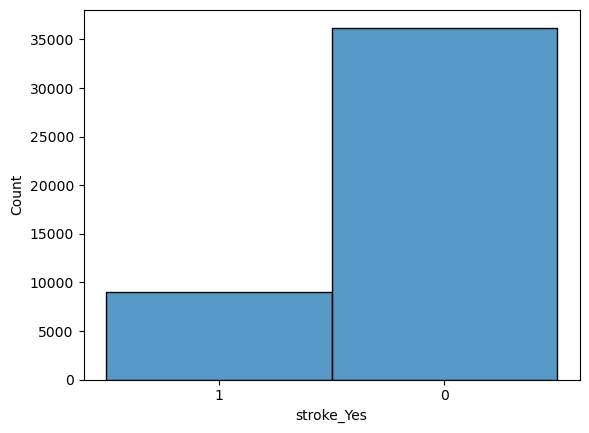

In [31]:
sns.histplot(train['stroke_Yes'].astype(str))

In [32]:
train['stroke_Yes'].value_counts(normalize=True)*100

0    80.0
1    20.0
Name: stroke_Yes, dtype: float64

In [33]:
x = train.drop('stroke_Yes',axis=1)
y = train['stroke_Yes']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
# Logistic Regression

lr = LogisticRegression()
lr.get_params()

lr_params = {'C':np.linspace(0.01,5,10),'l1_ratio':np.linspace(0,1,10),'penalty':['l1','l2','elasticnet',None]}
kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=23)
gcv_lr = GridSearchCV(lr,param_grid=lr_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [36]:
# Decision Tree

dtc = DecisionTreeClassifier()
dtc.get_params()

dtc_params = {'max_depth':[None,3,4,5,6,7,8],'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,5,10,20]}
gcv_dtc = GridSearchCV(dtc,param_grid=dtc_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [37]:
# Random Forest Classifier

rf = RandomForestClassifier()
rf.get_params()

rf_params = {'max_depth':[None,3,4],'max_features':[5,10,15,20],'n_estimators':[100,200,300,400]}
gcv_rf = GridSearchCV(rf,param_grid=rf_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [38]:
# XGBoost
logloss = {}
xgb = XGBClassifier()
xgb.get_params()

xgb_params = {'learning_rate':np.linspace(0.001,0.5,5),'max_depth':[None,2,5],'n_estimators':[100,200]}
gcv_xgb = GridSearchCV(xgb,param_grid=xgb_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [39]:
# Logistic regression fit

gcv_lr.fit(x,y)

print(gcv_lr.best_params_,gcv_lr.best_score_)
logloss['Logistic Regression'] = gcv_lr.best_score_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
V

{'C': 5.0, 'l1_ratio': 0.0, 'penalty': 'l2'} -0.30289507925416426


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Decision Tree fit

gcv_dtc.fit(x,y)

print(gcv_dtc.best_params_,gcv_dtc.best_score_)
logloss['Decision Tree'] = gcv_dtc.best_score_

Fitting 3 folds for each of 112 candidates, totalling 336 fits
{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2} -0.320427900399739


In [41]:
# Random Forest fit

gcv_rf.fit(x,y)

print(gcv_rf.best_params_,gcv_rf.best_score_)
logloss['Random Forest'] = gcv_rf.best_score_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'max_depth': None, 'max_features': 20, 'n_estimators': 300} -0.1750815795628116


In [42]:
# XGBoost fit

gcv_xgb.fit(x,y)

print(gcv_xgb.best_params_,gcv_xgb.best_score_)
logloss['XGBoost'] = gcv_xgb.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'learning_rate': 0.5, 'max_depth': None, 'n_estimators': 200} -0.08961002608734603


In [44]:
from sklearn.metrics import accuracy_score,log_loss

In [45]:
from sklearn.metrics import confusion_matrix
test_x = test.drop('stroke_Yes',axis =1)
test_y = test['stroke_Yes']

In [46]:
best_gcv_lr = gcv_lr.best_estimator_
pred = best_gcv_lr.predict(test_x)
print(accuracy_score(test_y,pred))


0.8697284445000626


In [47]:
best_gcv_dtc = gcv_dtc.best_estimator_
pred = best_gcv_dtc.predict(test_x)
accuracy_score(test_y,pred)


0.876486046802653

In [48]:
from sklearn.metrics import confusion_matrix
best_gcv_RF = gcv_rf.best_estimator_
pred = best_gcv_RF.predict(test_x)

print(accuracy_score(test_y,pred))


0.9471905894130898


In [49]:
best_gcv_xgb = gcv_xgb.best_estimator_
pred = best_gcv_xgb.predict(test_x)
accuracy_score(test_y,pred)


0.9781003629082718

In [50]:
from sklearn.ensemble import StackingClassifier 

In [51]:
lr = LogisticRegression(C= 1.6733333333333336, l1_ratio= 0.0, penalty= 'l2')
#svm = SVC(probability=True, random_state=23)
dtc = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split= 5,random_state=23)
models = [('LR', lr),('TREE',dtc)]
gbm = XGBClassifier(learning_rate= 0.12575, max_depth= 2, n_estimators= 100,random_state=23)
stack_xgb = StackingClassifier(estimators=models,
                           final_estimator=gbm,
                           passthrough=True)

In [52]:
stack_xgb.fit(x, y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: 

StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=1.6733333333333336,
                                                   l1_ratio=0.0)),
                               ('TREE',
                                DecisionTreeClassifier(max_depth=3,
                                                       min_samples_split=5,
                                                       random_state=23))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_c...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.12575,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=2, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=23, ...),
                   passthrough=True)

In [53]:
lr = LogisticRegression(C= 1.6733333333333336, l1_ratio= 0.0, penalty= 'l2')
#svm = SVC(probability=True, random_state=23)
dtc = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split= 5,random_state=23)
models = [('LR', lr),('TREE',dtc)]
#gbm = XGBClassifier(learning_rate= 0.2505, max_depth= None, n_estimators= 200,random_state=23)
rf = RandomForestClassifier(max_depth= 4, max_features= 20, n_estimators= 200)
stack_rf = StackingClassifier(estimators=models,
                           final_estimator=rf,
                           passthrough=True)

In [54]:
stack_rf.fit(x, y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: 

StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=1.6733333333333336,
                                                   l1_ratio=0.0)),
                               ('TREE',
                                DecisionTreeClassifier(max_depth=3,
                                                       min_samples_split=5,
                                                       random_state=23))],
                   final_estimator=RandomForestClassifier(max_depth=4,
                                                          max_features=20,
                                                          n_estimators=200),
                   passthrough=True)

In [55]:
pred = stack_rf.predict(test_x)
accuracy_score(test_y,pred)


0.8773620322863221

In [56]:
pred = stack_xgb.predict(test_x)
accuracy_score(test_y,pred)

0.8862470279063946

In [57]:
pred_proba = stack_rf.predict_proba(test_x)

In [58]:
log_loss(test_y,pred_proba[:,1])

0.2832779886679906

In [59]:
pred_proba_xgb = stack_xgb.predict_proba(test_x)

In [60]:
log_loss(test_y,pred_proba_xgb[:,1])

0.2647531751091056

In [61]:
import pickle

In [62]:
filename = 'brain_stroke_prediction_model.sav'
pickle.dump(best_gcv_xgb, open(filename, 'wb'))